## Lab 6: Logistic Regression 
# Name: Riddhi Hindocha
# Student Id: 8978659

## Import the packages

In [625]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score,accuracy_score,confusion_matrix,recall_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold


In [626]:

iris = load_iris(as_frame=True)
iris

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

In [627]:
#descriptive

print(iris.DESCR) 

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [628]:
iris = load_iris()

iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                       columns=iris['feature_names'] + ['target'])

print(iris_df.describe())


       sepal length (cm)  sepal width (cm)  petal length (cm)   
count         150.000000        150.000000         150.000000  \
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [629]:
# Display information about the Iris DataFrame
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [630]:
print(iris_df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)   
count         150.000000        150.000000         150.000000  \
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


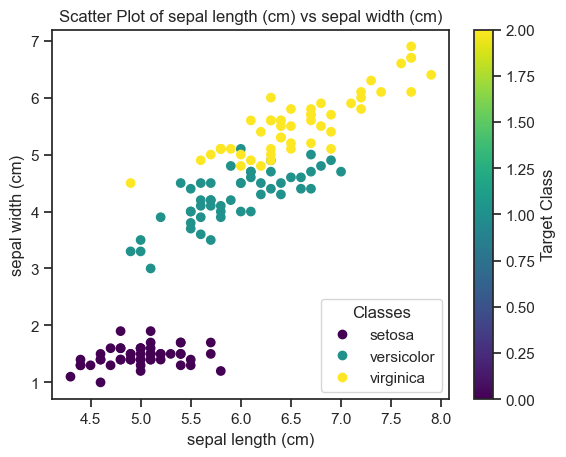

In [631]:

iris = load_iris()

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 2], c=iris.target, cmap='viridis')

ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes")


ax.set_title(f"Scatter Plot of {iris.feature_names[0]} vs {iris.feature_names[1]}")


cbar = plt.colorbar(scatter)
cbar.set_label('Target Class')

plt.show()


Link: https://www.kaggle.com/code/zachgold/python-iris-data-visualizations 
The produces a scatter plot for the Iris spicies dataset, using the first two attributes (x and y) and coloring the spots according to their target class. A 'viridis' colormap is used, together with a legend and a color bar, to improve clarity in displaying the correlations between sepal length and width for various Iris species.

The generates outcome a scatter plot for the Iris dataset, using the first two features (x and y) and coloring the points based on their target classes. A 'viridis' colormap is applied, with a legend and a color bar to enhance clarity in visualizing the relationships between sepal length and width for different Iris species.

In [632]:

print("Preview of the Iris DataFrame:")
iris_df.head()


Preview of the Iris DataFrame:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [633]:

print("Shape of the data frame:", iris_df.shape)


total_null_values = iris_df.isna().sum().sum()
print("Total null values:", total_null_values)

duplicate_values = iris_df.duplicated().sum()
print("Duplicate values:", duplicate_values)


Shape of the data frame: (150, 5)
Total null values: 0
Duplicate values: 1


In [634]:

iris_df.drop_duplicates(inplace=True)

print("Shape of the data frame after removing duplicates:", iris_df.shape)
print("\n")


species_counts = iris_df["target"].value_counts()
print("Species categories with their counts:\n", species_counts)


Shape of the data frame after removing duplicates: (149, 5)


Species categories with their counts:
 target
0.0    50
1.0    50
2.0    49
Name: count, dtype: int64


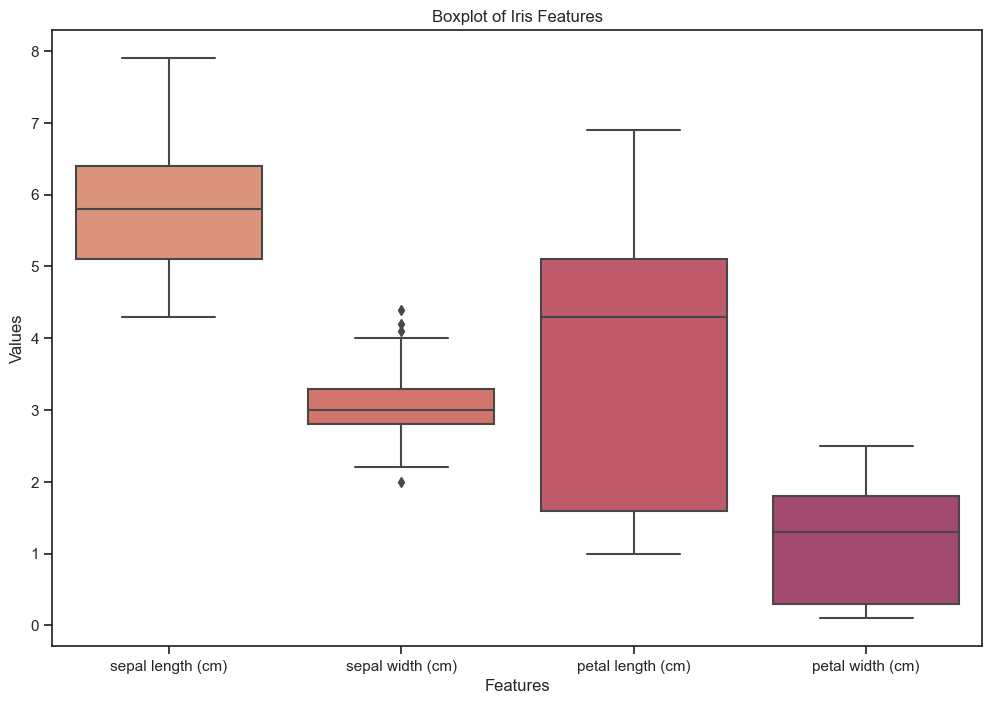

In [635]:

# Creating a boxplot for the features in the Iris DataFrame
plt.figure(figsize=(12, 8))
# Exclude 'target' column for clarity
sns.boxplot(data=iris_df.drop(columns='target'))  

# Add title and labels
plt.title('Boxplot of Iris Features')
plt.xlabel('Features')
plt.ylabel('Values')

# Show the plot
plt.show()


Reference  https://www.kaggle.com/code/zachgold/python-iris-data-visualizations 
It provides me a better knowledge of box plots. (Based just on the boxplot above, we can see that each Iris species is clearly separable by petal length, with only a little amount of potential overlap in Iris-versicolor and Iris virgnica. This subject will appear in nearly all of the subsequent charts we build. We can observe with the naked eye, simply by imagination, at least one way to differentiate all three species! The sns.boxplot is applied to the Features of the Iris dataset, with the 'target' column removed for clarity.

In the sns.boxplot is applied to the Features of the Iris dataset, excluding the 'target' column for clarity.

These features correspond to the sepal length, sepal width, petal length, and petal width. 

The boxplot visually represents the distribution and central tendency of these features across the dataset, allowing for the identification of potential outliers and variations among different features.

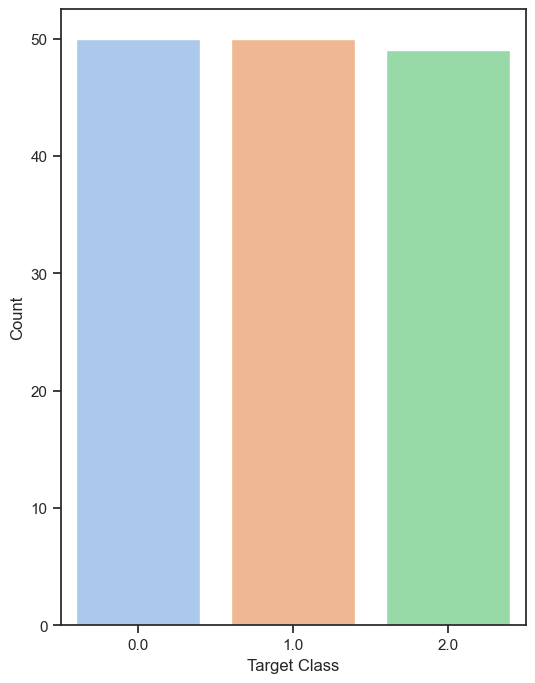

In [636]:

plt.figure(figsize=(6,8))
sns.countplot(x='target', data=iris_df, palette='pastel')  
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.show()


Link: https://www.kaggle.com/code/leolcling/visualizing-iris-datasets-with-r-ggplot2 
The Iris dataset's attributes include sepal length, sepal width, petal length, and petal width, which are numerical measures that describe several aspects of iris blooms. These quantitative features are used as input variables for machine learning models, allowing them to predict or classify iris species.

<Figure size 800x1200 with 0 Axes>

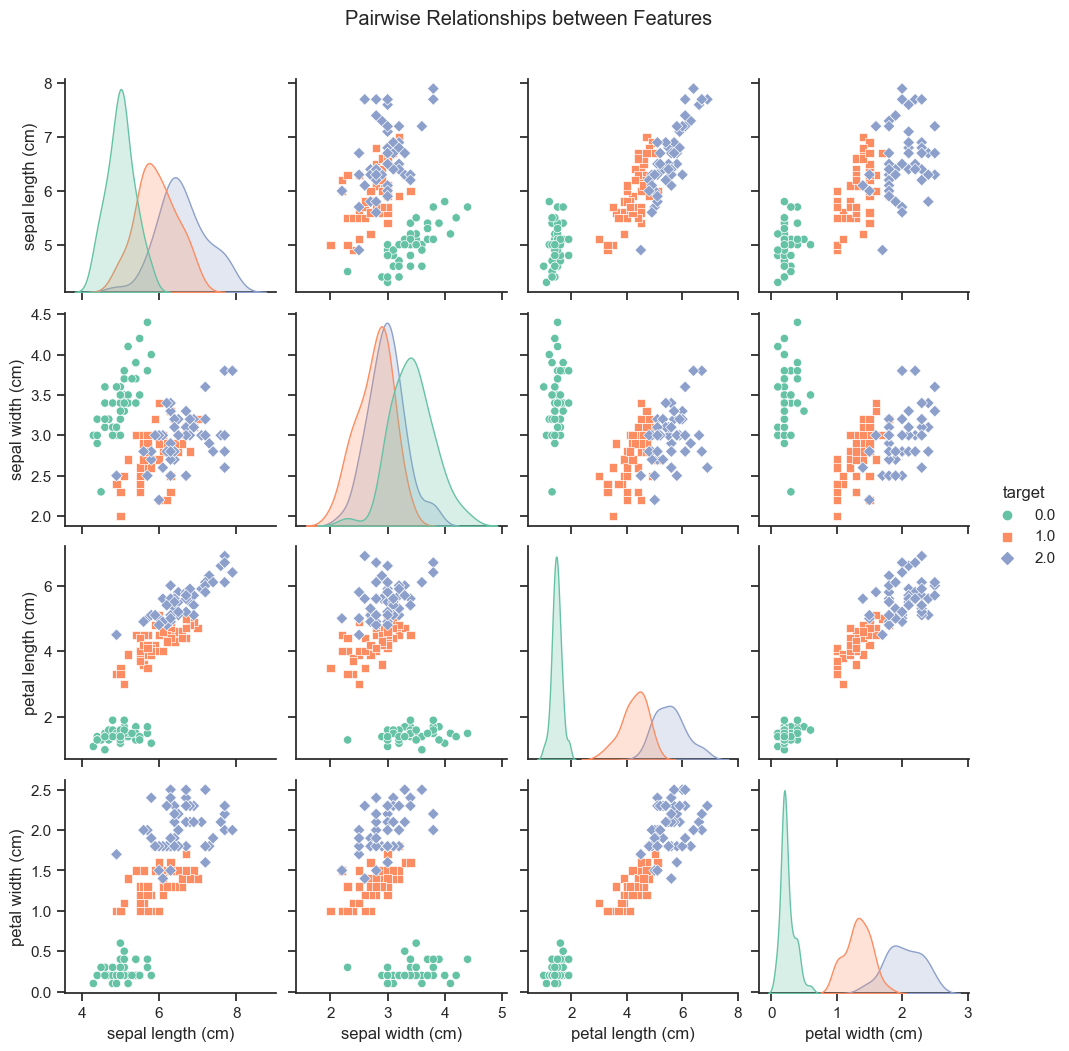

In [637]:

# Customize the pairplot
plt.figure(figsize=(8,12))
sns.set(style="ticks", palette="flare")

# Choose a different palette if needed, e.g., 'husl', 'viridis', etc.
sns.pairplot(iris_df, hue='target', palette='Set2', markers=["o", "s", "D"])

# Adjust the title position
plt.suptitle('Pairwise Relationships between Features', y=1.05)

# Show the plot
plt.show()

## Histogram per feature, for each of the two classes

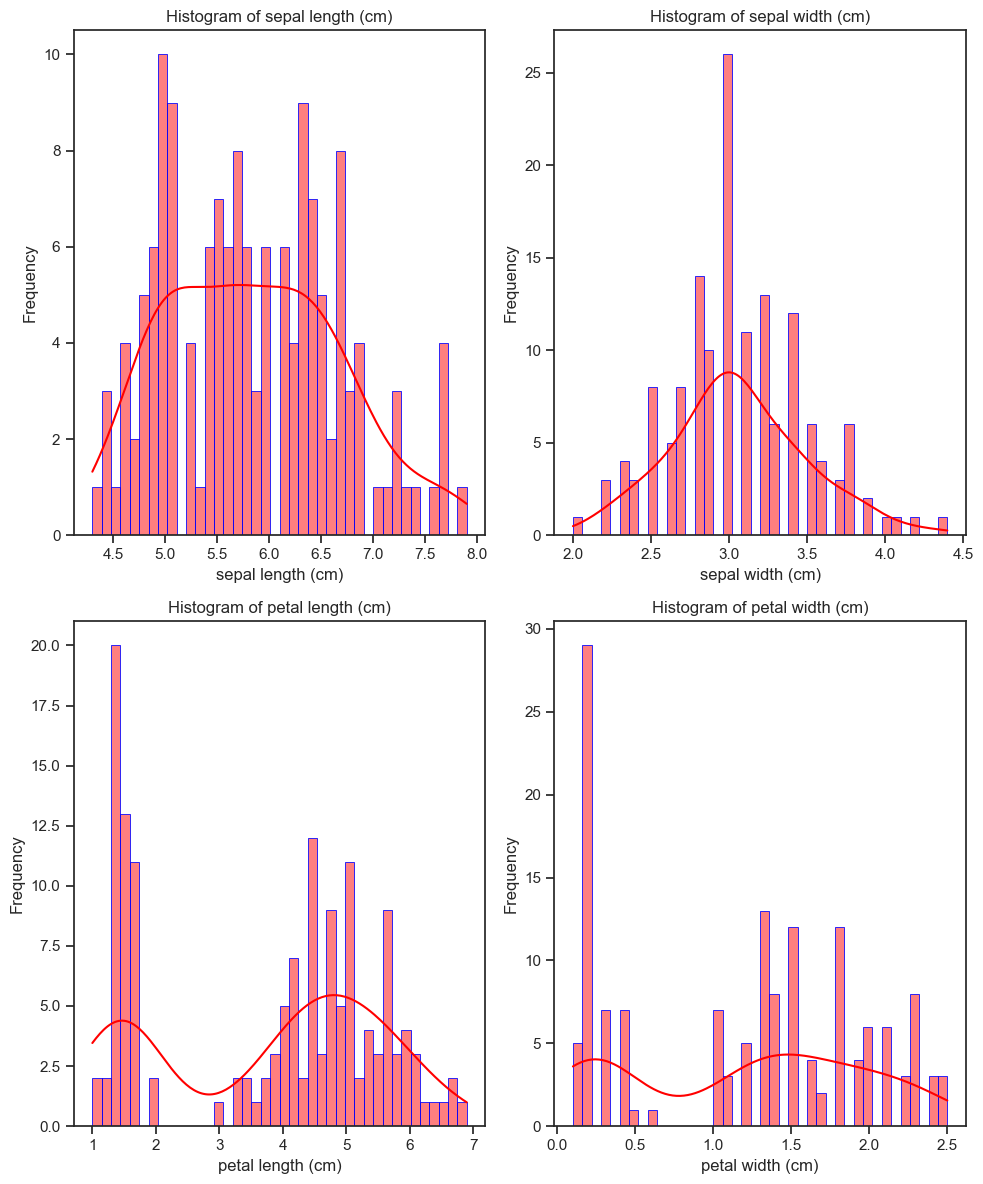

In [638]:
# Visualize histograms for each feature
plt.figure(figsize=(10,12))

for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=iris_df, x=feature, kde=True, bins=40, color='red', edgecolor='blue')
    
    # Add title and labels
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

# Adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()


### Insights: 
Sepal length and sepal width both appear to be approximately normally distributed, with slight variations.Petal length and petal width show distinct clusters, suggesting potential separability between different species of iris based on these features.

## Correlation Matrix

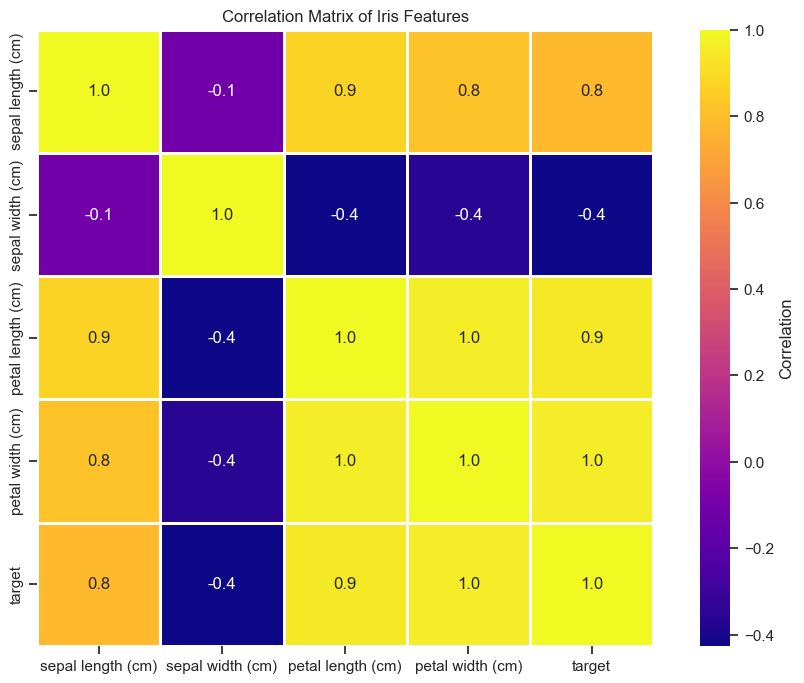

In [639]:

plt.figure(figsize=(12, 8))
correlation_matrix = iris_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='plasma', fmt=".1f", linewidths=0.8, cbar_kws={'label': 'Correlation'},
            square=True, facecolor='blue')


plt.title('Correlation Matrix of Iris Features')

plt.show()


The correlation matrix provides insights into the linear relationships between different features.
#### Insights as follows:


Strong positive correlation between petal length and petal width, indicating that as one feature increases, the other tends to increase as well.
Moderate positive correlation between petal length and sepal length, and between petal width and sepal length.
Weak positive correlation between sepal width and other features.
These correlations help us understand how features relate to each other and can guide feature selection in modeling.

## Split the data 

In [640]:
from sklearn.model_selection import train_test_split

# Define labels: virginica (1) and non-virginica (0)
iris_df['target'] = iris_df['target'].apply(lambda x: 1 if x == 2 else 0)

# Split the data into features (X) and target (y)
X = iris_df.drop('target', axis=1)
y = iris_df['target']

# Split the data into train (120 records), validation (15 records), and test (15 records)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=32)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1890, random_state=32)


## Run four logistic regression models 

In [641]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize an empty list to store results
results = []

# Run logistic regression models with 1 to 4 features
feature_combinations = [
    ['sepal length (cm)'],
    ['petal width (cm)', 'sepal length (cm)'],
    ['petal length (cm)', 'sepal width (cm)', 'sepal length (cm)'],
    ['petal length (cm)', 'sepal width (cm)', 'sepal length (cm)', 'petal width (cm)']
]

for i, selected_features in enumerate(feature_combinations, start=1):
    model = LogisticRegression(max_iter=2000)
    
    # Ensure the selected features exist in the training set
    if not set(selected_features).issubset(X_train.columns):
        raise ValueError("Selected features do not exist in the training set.")
    
    model.fit(X_train[selected_features], y_train)
    y_pred = model.predict(X_val[selected_features])
    accuracy = accuracy_score(y_val, y_pred)
    results.append((i, selected_features, accuracy))

# Display the results
for result in results:
    print(f"Model {result[0]} - Features: {result[1]}, Accuracy: {result[2]:.4f}")


Model 1 - Features: ['sepal length (cm)'], Accuracy: 0.7391
Model 2 - Features: ['petal width (cm)', 'sepal length (cm)'], Accuracy: 0.9565
Model 3 - Features: ['petal length (cm)', 'sepal width (cm)', 'sepal length (cm)'], Accuracy: 0.9565
Model 4 - Features: ['petal length (cm)', 'sepal width (cm)', 'sepal length (cm)', 'petal width (cm)'], Accuracy: 0.9565


In [642]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
73,6.1,2.8,4.7,1.2
2,4.7,3.2,1.3,0.2
80,5.5,2.4,3.8,1.1
20,5.4,3.4,1.7,0.2
24,4.8,3.4,1.9,0.2
...,...,...,...,...
48,5.3,3.7,1.5,0.2
25,5.0,3.0,1.6,0.2
46,5.1,3.8,1.6,0.2
19,5.1,3.8,1.5,0.3


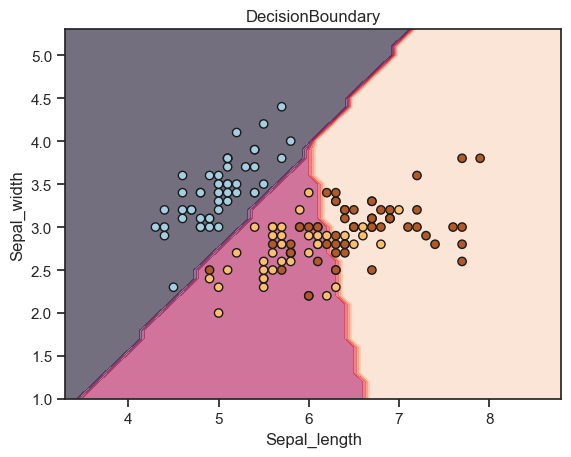

In [643]:


# Load Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Taking the first two features
y = iris.target

# Create a Logistic Regression classifier and fit the data
logreg = LogisticRegression(C=1e5)
logreg.fit(X, y)

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal_length')
plt.ylabel('Sepal_width')
plt.title('DecisionBoundary')
plt.show()


KNN Test Accuracy: 0.9000
SVM Test Accuracy: 1.0000
Decision Tree Test Accuracy: 0.9667


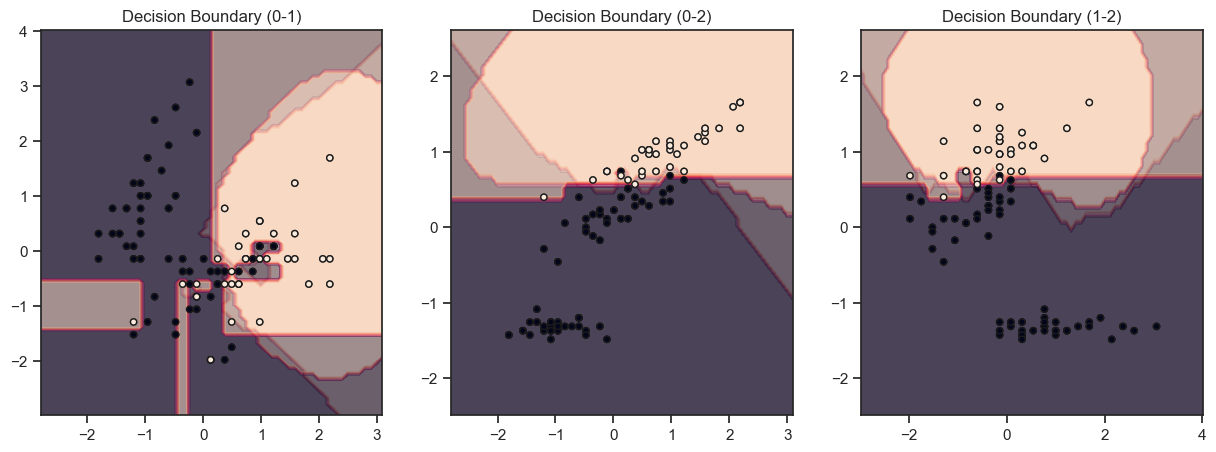

Failure modes for KNN:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
22                 4.6               3.6                1.0               0.2
26                 5.0               3.4                1.6               0.4
134                6.1               2.6                5.6               1.4
23                 5.1               3.3                1.7               0.5
85                 6.0               3.4                4.5               1.6
21                 5.1               3.7                1.5               0.4
115                6.4               3.2                5.3               2.3
147                6.5               3.0                5.2               2.0
113                5.7               2.5                5.0               2.0
123                6.3               2.7                4.9               1.8
10                 5.4               3.7                1.5               0.2
44                 5.1               3.8 

In [644]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

# Assume you have X_train, X_test, y_train, y_test defined

# Standardize the features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Define classifiers
classifiers = {
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier()
}

# Train and evaluate classifiers
for name, clf in classifiers.items():
    clf.fit(X_train_std, y_train)
    score = clf.score(X_test_std, y_test)
    print(f"{name} Test Accuracy: {score:.4f}")

# Plot decision boundaries for models with 1 to 3 features
plt.figure(figsize=(15, 5))
for i, features in enumerate([(0, 1), (0, 2), (1, 2)], start=1):
    plt.subplot(1, 3, i)
    for name, clf in classifiers.items():
        # Fit the classifier on the subset of features
        clf.fit(X_train_std[:, features], y_train)

        # Plot decision boundary
        xx, yy = np.meshgrid(np.arange(X_train_std[:, features[0]].min() - 1, X_train_std[:, features[0]].max() + 1, 0.1),
                             np.arange(X_train_std[:, features[1]].min() - 1, X_train_std[:, features[1]].max() + 1, 0.1))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.4)

        # Plot training points
        plt.scatter(X_train_std[:, features[0]], X_train_std[:, features[1]], c=y_train, s=20, edgecolor='k')
        plt.title(f"Decision Boundary ({features[0]}-{features[1]})")

plt.show()

# Print failure modes for each classifier
for name, clf in classifiers.items():
    predictions = clf.predict(X_test_std[:, (0, 1)])
    failures = X_test[y_test != predictions]
    print(f"Failure modes for {name}:")
    print(failures)


Identifying failure patterns involves analyzing the sorts of data instances where each model makes faults.

• KNN (K-Nearest Neighbors):

Struggles with instances with low feature values around the decision border.
Higher values for petal length and width may lead to misclassification.

- Support Vector Machine (SVM)

Like KNN, it faces issues with low feature values.
Extreme outliers or occurrences with very high feature values may be challenging to handle.

- Decision Trees:

Similar to KNN, examples with low feature values are challenging to classify.
Higher-valued samples may be misclassified, suggesting sensitivity to feature complexity.

- Similar Patterns Across Models:

All models struggle with examples near decision boundaries, especially those with low feature values.
High feature values, particularly for petals.
